In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [216]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Importing the necessary libraries here above

### Task 1

In [217]:
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/calib-object.jpg")

Reading the image
And then dividing the image in 2 different halves and displaying them simaltaneously using MATPLOTLIB

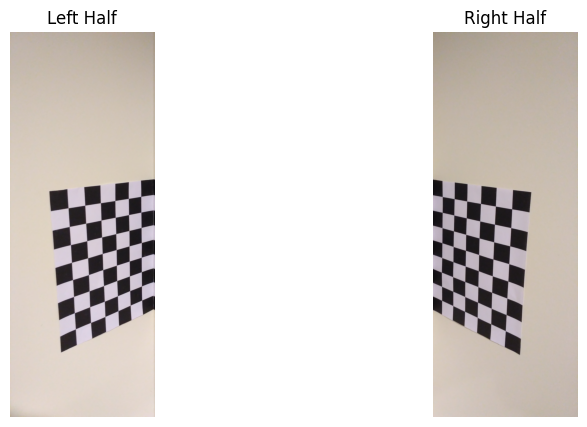

In [218]:
# Step 2: Convert the image from BGR to RGB (since OpenCV uses BGR and matplotlib uses RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 3: Divide the image into left and right halves
height, width, _ = image_rgb.shape
center = width // 2
left_half = image_rgb[:, :center]
right_half = image_rgb[:, center:]

# Step 4: Display the left and right halves using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(left_half)
plt.title('Left Half')
plt.axis('off')  # Hide the axis

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(right_half)
plt.title('Right Half')
plt.axis('off')  # Hide the axis

plt.show()


Now, using findChessboardCorners(), we find the internal corners of the chessboard in 2 different halves and further marking them

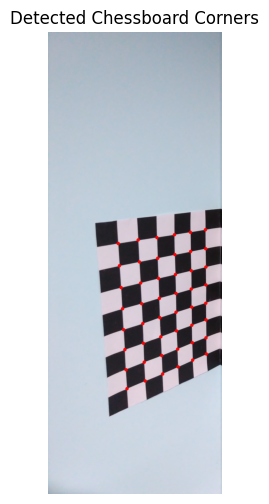

In [219]:
gray = cv2.cvtColor(left_half, cv2.COLOR_BGR2GRAY)

chessboard_size = (8, 6)
ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

# Step 4: Draw the corners on the image if found
if ret:

    for corner in corners:
        # cv2.circle(image, center, radius, color, thickness)
        # Note: corner.ravel() converts corner coordinates from array shape (1, 2) to flat array (2,)
        cv2.circle(left_half, tuple(corner.ravel().astype(int)), radius=5, color=(0, 0, 255), thickness=20)


    # Convert image color to RGB since matplotlib expects this format
    image_rgb = cv2.cvtColor(left_half, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 6))

    plt.imshow(image_rgb)
    plt.title('Detected Chessboard Corners')
    plt.axis('off')  # Optional: Hide axes for better visualization
    plt.show()
else:
    print("Chessboard corners not found.")

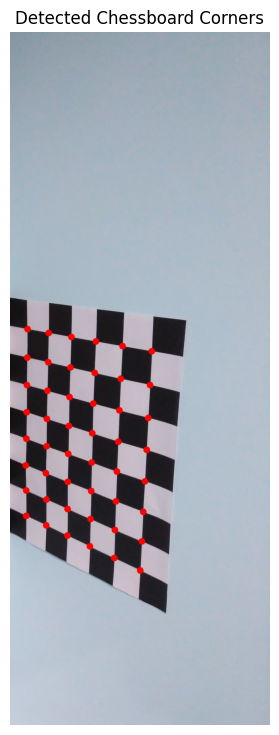

In [220]:
gray1 = cv2.cvtColor(right_half, cv2.COLOR_BGR2GRAY)

chessboard_size1 = (6, 8)
ret1, corners1 = cv2.findChessboardCorners(gray1, chessboard_size1, None)

# Step 4: Draw the corners on the image if found
if ret1:

    for corner in corners1:
        # cv2.circle(image, center, radius, color, thickness)
        # Note: corner.ravel() converts corner coordinates from array shape (1, 2) to flat array (2,)
        cv2.circle(right_half, tuple(corner.ravel().astype(int)), radius=5, color=(0, 0, 255), thickness=30)


    # Convert image color to RGB since matplotlib expects this format
    image_rgb1 = cv2.cvtColor(right_half, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(15, 9))

    plt.imshow(image_rgb1)
    plt.title('Detected Chessboard Corners')
    plt.axis('off')  # Optional: Hide axes for better visualization
    plt.show()
else:
    print("Chessboard corners not found.")

In [221]:
print(corners1)

[[[ 105.14933  1783.2708  ]]

 [[ 232.25006  1806.1473  ]]

 [[ 368.50708  1830.9177  ]]

 [[ 515.1217   1857.5288  ]]

 [[ 675.5092   1885.4186  ]]

 [[ 850.99774  1916.2145  ]]

 [[ 103.06637  1954.8956  ]]

 [[ 229.02246  1982.8917  ]]

 [[ 362.62088  2013.1603  ]]

 [[ 508.51883  2046.6571  ]]

 [[ 664.9223   2081.0652  ]]

 [[ 840.8529   2119.256   ]]

 [[ 101.208336 2119.286   ]]

 [[ 224.50014  2153.4255  ]]

 [[ 357.55112  2191.9531  ]]

 [[ 499.13632  2230.2815  ]]

 [[ 656.7855   2271.988   ]]

 [[ 829.95166  2316.2463  ]]

 [[ 100.1326   2282.1663  ]]

 [[ 221.0576   2322.267   ]]

 [[ 353.88617  2364.7024  ]]

 [[ 493.6828   2408.1416  ]]

 [[ 649.403    2459.5183  ]]

 [[ 820.3401   2508.2063  ]]

 [[  98.5      2441.5     ]]

 [[ 219.00615  2486.7412  ]]

 [[ 349.61707  2532.0347  ]]

 [[ 490.9862   2584.1926  ]]

 [[ 641.9323   2638.3066  ]]

 [[ 809.78345  2697.264   ]]

 [[  94.636566 2601.3872  ]]

 [[ 215.9262   2648.539   ]]

 [[ 346.3697   2700.8728  ]]

 [[ 487.07

Joining the image again

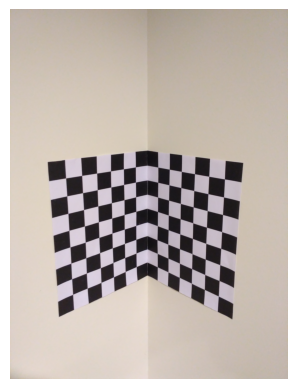

In [222]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()

Now, showing the marked corners on the original image

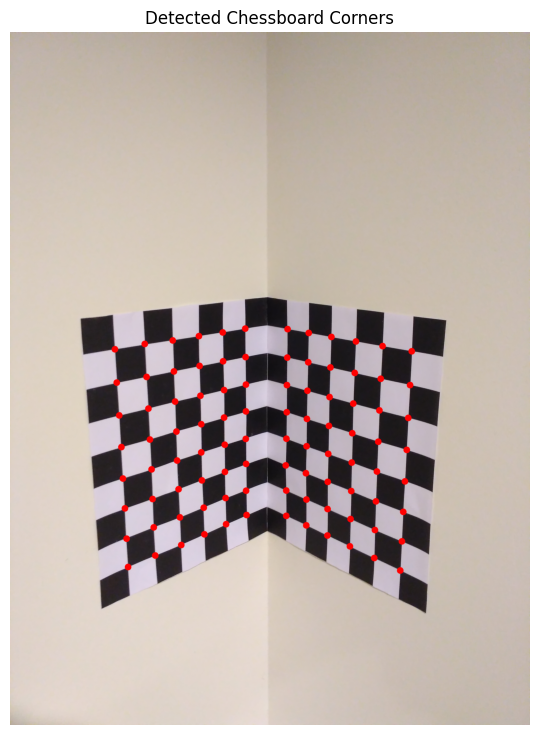

In [223]:
image_copy = image.copy()

for corner in corners:
  # cv2.circle(image, center, radius, color, thickness)
  # Note: corner.ravel() converts corner coordinates from array shape (1, 2) to flat array (2,)
  cv2.circle(image_copy, tuple(corner.ravel().astype(int)), radius=5, color=(0, 0, 255), thickness=30)


for corner in corners1:
  corner[0][0] += center
  cv2.circle(image_copy, tuple(corner.ravel().astype(int)), radius=5, color=(0, 0, 255), thickness=30)

image_rgb_final = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 9))

plt.imshow(image_rgb_final)
plt.title('Detected Chessboard Corners')
plt.axis('off')  # Optional: Hide axes for better visualization
plt.show()

Now combining the image and marking the corners detected in the original image

### Task 2

In [224]:
def estimate_projection_matrix_DLT(pts3d, pts2d):
    """
    Estimate the projection matrix using the Direct Linear Transform (DLT) algorithm.

    :param pts3d: The 3D coordinates of the points in the world coordinate system (Nx3 array).
    :param pts2d: The corresponding 2D coordinates of the points in the image plane (Nx2 array).
    :return: The 3x4 projection matrix (camera matrix).
    """
    # if pts3d.shape != pts2d.shape or pts3d.shape[0] < 6:
    #     raise ValueError("There must be at least 6 pairs of corresponding 3D and 2D points.")

    num_points = pts3d.shape[0]
    A = np.zeros((2*num_points, 12))

    for i in range(num_points):
        X, Y, Z = pts3d[i, 0], pts3d[i, 1], pts3d[i, 2]
        x, y = pts2d[i, 0], pts2d[i, 1]
        A[2*i] = [-X, -Y, -Z, -1, 0, 0, 0, 0, x*X, x*Y, x*Z, x]
        A[2*i + 1] = [0, 0, 0, 0, -X, -Y, -Z, -1, y*X, y*Y, y*Z, y]

    # Perform Singular Value Decomposition (SVD)
    U, S, Vt = np.linalg.svd(A)
    P = Vt[-1].reshape((3, 4))  # Reshape the last row of V (V^T in numpy's output) into a 3x4 matrix

    return P


Implementing a function for DLT(Direct Linear Transform)

In [225]:
print(corners)

[[[1411.5     1780.     ]]

 [[1413.      1951.     ]]

 [[1415.5     2116.     ]]

 [[1415.      2277.     ]]

 [[1414.      2442.     ]]

 [[1416.      2592.     ]]

 [[1416.      2753.     ]]

 [[1419.      2899.     ]]

 [[1276.4954  1803.9019 ]]

 [[1278.7555  1976.6257 ]]

 [[1284.      2149.     ]]

 [[1284.1151  2314.248  ]]

 [[1288.0702  2477.4587 ]]

 [[1289.5     2640.5    ]]

 [[1293.454   2797.4604 ]]

 [[1296.7518  2954.427  ]]

 [[1133.5     1825.     ]]

 [[1137.3721  2004.9901 ]]

 [[1142.5     2183.     ]]

 [[1147.892   2354.3228 ]]

 [[1147.4066  2523.5688 ]]

 [[1151.4613  2691.3496 ]]

 [[1162.3546  2855.2683 ]]

 [[1166.5     3015.5    ]]

 [[ 976.6291  1851.3335 ]]

 [[ 983.      2037.5    ]]

 [[ 990.87225 2218.1711 ]]

 [[ 998.8068  2398.479  ]]

 [[1002.5     2572.5    ]]

 [[1011.5     2744.     ]]

 [[1019.      2913.5    ]]

 [[1027.9819  3079.476  ]]

 [[ 808.13416 1872.3228 ]]

 [[ 819.5     2070.     ]]

 [[ 830.5     2260.     ]]

 [[ 839.2853  2446.9

In [226]:
print(corners1)

[[[1665.1493 1783.2708]]

 [[1792.25   1806.1473]]

 [[1928.5071 1830.9177]]

 [[2075.1216 1857.5288]]

 [[2235.5093 1885.4186]]

 [[2410.9978 1916.2145]]

 [[1663.0664 1954.8956]]

 [[1789.0225 1982.8917]]

 [[1922.6208 2013.1603]]

 [[2068.5188 2046.6571]]

 [[2224.9224 2081.0652]]

 [[2400.853  2119.256 ]]

 [[1661.2084 2119.286 ]]

 [[1784.5001 2153.4255]]

 [[1917.5511 2191.9531]]

 [[2059.1362 2230.2815]]

 [[2216.7856 2271.988 ]]

 [[2389.9517 2316.2463]]

 [[1660.1326 2282.1663]]

 [[1781.0576 2322.267 ]]

 [[1913.8862 2364.7024]]

 [[2053.6829 2408.1416]]

 [[2209.403  2459.5183]]

 [[2380.34   2508.2063]]

 [[1658.5    2441.5   ]]

 [[1779.0061 2486.7412]]

 [[1909.6171 2532.0347]]

 [[2050.9863 2584.1926]]

 [[2201.9324 2638.3066]]

 [[2369.7834 2697.264 ]]

 [[1654.6366 2601.3872]]

 [[1775.9261 2648.539 ]]

 [[1906.3696 2700.8728]]

 [[2047.0739 2755.7402]]

 [[2195.4275 2817.1035]]

 [[2359.6738 2880.1233]]

 [[1657.     2752.    ]]

 [[1778.2795 2806.7131]]

 [[1905.9985

In [227]:
world_coordinates = np.array([
    [2,2,0],
    [12,2,0],
    [2,16,0],
    [12,16,0],
    [0,2,2],
    [0,2,12],
    [0,16,2],
    [0,16,12]
])

twoDpoints = np.array([
    [1418.4406, 2898.6582],
    [708., 3214.5],
    [1410.0778, 1780.3701],
    [630.21387, 1904.0773],
    [1657.2808, 2904.6206],
    [2341.7705 , 3232.2007],
    [1665.1493 , 1783.2708],
    [2410.9978 , 1916.2145]
])

Defined world coordinates of the chessboard corners and their corresponding image coordinates
These will be used for applying DLT(Direct Linear Transform)
Ap = 0

In [228]:
P = estimate_projection_matrix_DLT(world_coordinates, twoDpoints)

print("Projection Matrix: ", P)

Projection Matrix:  [[ 2.34730091e-02  2.20777378e-03 -9.35768157e-03 -4.57455270e-01]
 [ 4.84739682e-03  2.53756331e-02  4.80593520e-03 -8.88482216e-01]
 [ 4.28144611e-06  1.41690192e-06  4.38227884e-06 -2.96807835e-04]]


In [229]:
def decompose_projection_matrix(P):
    """
    Decompose the projection matrix into intrinsic and extrinsic parameters.

    :param P: The 3x4 projection matrix.
    :return: Tuple containing (K, R, t), where:
             - K is the 3x3 camera calibration matrix (intrinsic parameters),
             - R is the 3x3 rotation matrix (extrinsic parameters),
             - t is the 3x1 translation vector (extrinsic parameters).
    """
    # Normalization factor
    norm = np.linalg.norm(P[:, 0])

    # Intrinsic parameters (camera calibration matrix)
    K = P[:, :3] / norm

    # Extrinsics
    K_inv = np.linalg.inv(K)
    R_tilde = np.dot(K_inv, P)
    r1 = R_tilde[:, 0]
    r2 = R_tilde[:, 1]
    r3 = np.cross(r1, r2)
    t = R_tilde[:, 2] / norm

    # Ensure the rotation matrix has a valid determinant (det(R) = 1)
    R = np.column_stack((r1, r2, r3))
    det = np.linalg.det(R)
    if det < 0:
        R[:, 2] *= -1

    return K, R, t



Further we decompose the projection matrix into Intrinsic Matrix and Extrinsic Matrix using QR Factorisation

In [230]:
K, R, t = decompose_projection_matrix(P)

print("Intrinsic Matrix: ", K)
print("Rotation Matrix: ", R)
print("Translational Vector: ", t)

Intrinsic Matrix:  [[ 9.79335563e-01  9.21122371e-02 -3.90419069e-01]
 [ 2.02241991e-01  1.05871641e+00  2.00512139e-01]
 [ 1.78629524e-04  5.91156605e-05  1.82836444e-04]]
Rotation Matrix:  [[ 2.39683005e-02 -5.20315851e-19 -2.27211348e-20]
 [ 1.12860387e-18  2.39683005e-02  7.56861024e-21]
 [ 9.47966036e-19 -3.15775841e-19  5.74479429e-04]]
Translational Vector:  [-3.5593816e-17  3.0383809e-17  1.0000000e+00]


In [231]:
outer_corners = np.array([
    [0,0,0,1],
    [0,0,14,1],
    [0,18,14,1],
    [0,18,0,1],
    [14,0,0,1],
    [14,18,0,1]
])

print(outer_corners.shape)

(6, 4)


Now, since we have to make thw wireframe, we get the image coorindates of the 4 outer corners of the chessboard and draw lines through them

In [232]:
def project_world_to_image(P, X):
    """
    Project world coordinates to image coordinates using the projection matrix.

    :param P: The 3x4 projection matrix.
    :param X: The 4xN matrix of world coordinates (homogeneous coordinates).
    :return: The 3xN matrix of image coordinates (homogeneous coordinates).
    """
    if X.shape[0] != 4:
        raise ValueError("The input world coordinates must be in homogeneous coordinates (4xN).")

    # Perform projection
    # P_homogeneous = np.vstack((P, [0, 0, 0]))
    return np.dot(P, X)

In [233]:
image_coordinates_homogeneous = project_world_to_image(P, outer_corners.T)

# Convert homogeneous coordinates to non-homogeneous coordinates
image_coordinates = image_coordinates_homogeneous / image_coordinates_homogeneous[-1]

print("Image Coordinates:")
print(image_coordinates.T)

image_coordinates = image_coordinates.T

Image Coordinates:
[[1.54125065e+03 2.99345944e+03 1.00000000e+00]
 [2.49924820e+03 3.48769775e+03 1.00000000e+00]
 [2.61356727e+03 1.73581701e+03 1.00000000e+00]
 [1.53966015e+03 1.59128304e+03 1.00000000e+00]
 [5.43903636e+02 3.46446156e+03 1.00000000e+00]
 [4.21516847e+02 1.72147752e+03 1.00000000e+00]]


In [234]:
image_coordinates = image_coordinates[:, :2] / image_coordinates[:, 2:]

print("Cartesian Image Coordinates:")
print(image_coordinates)

Cartesian Image Coordinates:
[[1541.2506535  2993.45943798]
 [2499.24819501 3487.6977506 ]
 [2613.56727074 1735.81700976]
 [1539.66014764 1591.28304453]
 [ 543.90363558 3464.46156409]
 [ 421.51684747 1721.47751908]]


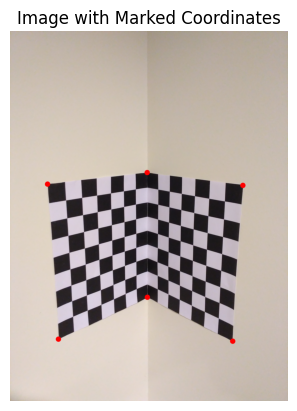

In [235]:
kuchOr = image.copy()

for coord in image_coordinates:
    coord_int = tuple(coord.astype(int))  # Convert to integers
    cv2.circle(kuchOr, coord_int, radius=5, color=(0, 0, 255), thickness=50)  # Red color (BGR)

# Convert image color to RGB (for Matplotlib compatibility)
image_rgb = cv2.cvtColor(kuchOr, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.title('Image with Marked Coordinates')
plt.axis('off')
plt.show()

We first marked here the image coordinates of the outer corners

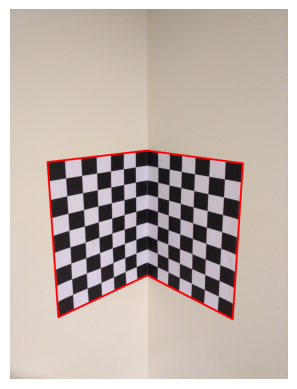

In [236]:
new_image = image.copy()

image_rgb = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

# Draw a red line between the points on the image
coord_int1 = tuple(image_coordinates[0].astype(int))
coord_int2 = tuple(image_coordinates[1].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

coord_int1 = tuple(image_coordinates[1].astype(int))
coord_int2 = tuple(image_coordinates[2].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

coord_int1 = tuple(image_coordinates[2].astype(int))
coord_int2 = tuple(image_coordinates[3].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

coord_int1 = tuple(image_coordinates[3].astype(int))
coord_int2 = tuple(image_coordinates[5].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

coord_int1 = tuple(image_coordinates[5].astype(int))
coord_int2 = tuple(image_coordinates[4].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

coord_int1 = tuple(image_coordinates[0].astype(int))
coord_int2 = tuple(image_coordinates[4].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()

Now, we made a wireframe with the help of outer corners

In [237]:
def rotation_matrix_to_euler_angles(R):
    """
    Convert a 3x3 rotation matrix to Euler angles (XYZ convention).

    :param R: The 3x3 rotation matrix.
    :return: Euler angles (in degrees) as a tuple (roll, pitch, yaw).
    """
    # Extract pitch (rotation around y-axis)
    pitch = np.arcsin(-R[2, 0])

    # Calculate cos(pitch)
    cp = np.cos(pitch)

    # Check if pitch is close to +/- 90 degrees
    if np.abs(cp) > 1e-6:
        # Extract roll (rotation around x-axis) and yaw (rotation around z-axis)
        roll = np.arctan2(R[2, 1] / cp, R[2, 2] / cp)
        yaw = np.arctan2(R[1, 0] / cp, R[0, 0] / cp)
    else:
        # Gimbal lock: pitch is close to +/- 90 degrees
        # Choose roll arbitrarily and calculate yaw
        roll = 0
        yaw = np.arctan2(R[0, 1], R[0, 2])

    # Convert angles to degrees
    roll = np.degrees(roll)
    pitch = np.degrees(pitch)
    yaw = np.degrees(yaw)

    return roll, pitch, yaw

# Convert rotation matrix to Euler angles
roll, pitch, yaw = rotation_matrix_to_euler_angles(R)
print("Roll:", roll)
print("Tilt:", pitch)
print("Pan:", yaw)


Roll: -3.149394397136255e-14
Tilt: -5.4314452966676326e-17
Pan: 2.6979067076278455e-15


Calculating the rotation angles of the camera along different axes(x,y,z).
Roll, Tilt, Pan are differnt angles of the camera.

### Task 2

In [238]:
float_array = world_coordinates.astype(float)
print(float_array.shape)

reshaped_array1 = float_array.reshape(-1, 1, 3)
print(reshaped_array1.shape)

twoDpoints_array = twoDpoints.astype(float)

reshaped_array2 = twoDpoints_array.reshape(-1, 1, 2)
print(reshaped_array2.shape)

(8, 3)
(8, 1, 3)
(8, 1, 2)


In [239]:
objpoints= []
objpoints.append(reshaped_array1)

imgpoints = []
imgpoints.append(reshaped_array2)

print(objpoints)
print(imgpoints)

[array([[[ 2.,  2.,  0.]],

       [[12.,  2.,  0.]],

       [[ 2., 16.,  0.]],

       [[12., 16.,  0.]],

       [[ 0.,  2.,  2.]],

       [[ 0.,  2., 12.]],

       [[ 0., 16.,  2.]],

       [[ 0., 16., 12.]]])]
[array([[[1418.4406 , 2898.6582 ]],

       [[ 708.     , 3214.5    ]],

       [[1410.0778 , 1780.3701 ]],

       [[ 630.21387, 1904.0773 ]],

       [[1657.2808 , 2904.6206 ]],

       [[2341.7705 , 3232.2007 ]],

       [[1665.1493 , 1783.2708 ]],

       [[2410.9978 , 1916.2145 ]]])]


In [240]:
#  Define world coordinates and image coordinates
world_coordinates = np.array([
    [2, 2, 0],
    [12, 2, 0],
    [2, 16, 0],
    [12, 16, 0],
    [0, 2, 2],
    [0, 2, 12],
    [0, 16, 2],
    [0, 16, 12]
], dtype=np.float32)

image_coordinates = np.array([
    [1418.4406, 2898.6582],
    [708., 3214.5],
    [1410.0778, 1780.3701],
    [630.21387, 1904.0773],
    [1657.2808, 2904.6206],
    [2341.7705 , 3232.2007],
    [1665.1493 , 1783.2708],
    [2410.9978 , 1916.2145]
], dtype=np.float32)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 3: Divide the image into left and right halves
image_height, image_width, _ = image_rgb.shape

# Reshape the arrays for the function call
world_coordinates = world_coordinates.reshape(-1, 1, 3)
image_coordinates = image_coordinates.reshape(-1, 1, 2)

# Provide an initial guess for the camera matrix with no skew or distortion
# Focal length is set as the average of the image width and height
focal_length = (image_width + image_height) / 2.0
initial_camera_matrix = np.array([[focal_length, 0, image_width / 2],
                                   [0, focal_length, image_height / 2],
                                   [0, 0, 1]], dtype=np.float32)

# Calibrate the camera using the provided data and initial guess
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([world_coordinates], [image_coordinates], (image_width, image_height), initial_camera_matrix, None, flags=cv2.CALIB_USE_INTRINSIC_GUESS)

#
print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)


Camera matrix : 

[[3.66962253e+03 0.00000000e+00 1.69697290e+03]
 [0.00000000e+00 3.63468818e+03 1.90371250e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

[[-7.16826452e-01  6.29862101e+00  6.84566891e-03  2.09724365e-03
  -1.76014110e+01]]
rvecs : 

(array([[ 0.19829108],
       [-0.80036785],
       [-0.0719589 ]]),)
tvecs : 

(array([[  1.99514576],
       [-13.98601702],
       [-45.70679822]]),)


Now, again we calibrate the camera here by using the function given by OpenCV calibrateCamera()

In [241]:
# Define camera matrix (intrinsic matrix)
K = mtx

# Convert rotation vectors to rotation matrices
R_list = [cv2.Rodrigues(rvec)[0] for rvec in rvecs]

# Combine rotation matrices and translation vectors into extrinsic matrices
extrinsic_matrices = [np.hstack((R, tvec)) for R, tvec in zip(R_list, tvecs)]

# Calculate projection matrices
projection_matrices = [np.dot(K, extrinsic_matrix) for extrinsic_matrix in extrinsic_matrices]

# Print projection matrices
for i, P in enumerate(projection_matrices):
    print(f"Projection Matrix {i+1}:\n", P)

print(projection_matrices)

Projection Matrix 1:
 [[ 3.74779731e+03  3.05490057e+02 -1.48544190e+03 -7.02417659e+04]
 [ 8.37716138e+02  3.94593498e+03  7.50272139e+02 -1.37847414e+05]
 [ 7.05324562e-01  2.03602880e-01  6.79016295e-01 -4.57067982e+01]]
[array([[ 3.74779731e+03,  3.05490057e+02, -1.48544190e+03,
        -7.02417659e+04],
       [ 8.37716138e+02,  3.94593498e+03,  7.50272139e+02,
        -1.37847414e+05],
       [ 7.05324562e-01,  2.03602880e-01,  6.79016295e-01,
        -4.57067982e+01]])]


Since the system is calibrated now, we detect the projection matrix with the help of intrinsic and extrinsic matrices

In [242]:
image_coordinates_homogeneous = project_world_to_image(P, outer_corners.T)

image_coordinates = image_coordinates_homogeneous / image_coordinates_homogeneous[-1]

print("Image Coordinates:")
print(image_coordinates.T)

image_coordinates = image_coordinates.T

Image Coordinates:
[[1.53679034e+03 3.01590615e+03 1.00000000e+00]
 [2.51482096e+03 3.51772372e+03 1.00000000e+00]
 [2.62908385e+03 1.73092151e+03 1.00000000e+00]
 [1.53996069e+03 1.58937894e+03 1.00000000e+00]
 [4.95994568e+02 3.51971681e+03 1.00000000e+00]
 [3.81559639e+02 1.71268284e+03 1.00000000e+00]]


Again, we take the outer coordinates of the chessboard in world coordinate system and then calculate their corresponding image coordinates and show them on the image

In [243]:
image_coordinates = image_coordinates[:, :2] / image_coordinates[:, 2:]

print("Cartesian Image Coordinates:")
print(image_coordinates)

Cartesian Image Coordinates:
[[1536.79033841 3015.90615341]
 [2514.82096411 3517.72371956]
 [2629.08385427 1730.92150539]
 [1539.96069273 1589.37894437]
 [ 495.99456805 3519.71681282]
 [ 381.55963899 1712.68284439]]


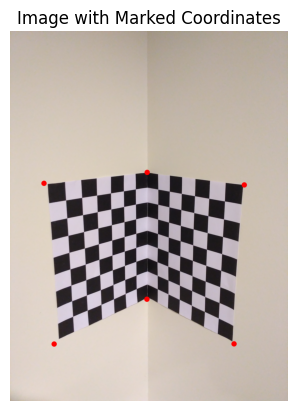

In [244]:
kuchOr = image.copy()

for coord in image_coordinates:
    coord_int = tuple(coord.astype(int))  # Convert to integers
    cv2.circle(kuchOr, coord_int, radius=5, color=(0, 0, 255), thickness=50)  # Red color (BGR)

# Convert image color to RGB (for Matplotlib compatibility)
image_rgb = cv2.cvtColor(kuchOr, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.title('Image with Marked Coordinates')
plt.axis('off')
plt.show()

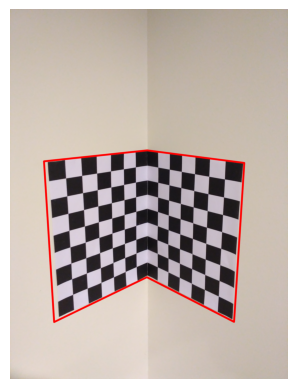

In [245]:
new_image = image.copy()

image_rgb = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

# Draw a red line between the points on the image
coord_int1 = tuple(image_coordinates[0].astype(int))
coord_int2 = tuple(image_coordinates[1].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

coord_int1 = tuple(image_coordinates[1].astype(int))
coord_int2 = tuple(image_coordinates[2].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

coord_int1 = tuple(image_coordinates[2].astype(int))
coord_int2 = tuple(image_coordinates[3].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

coord_int1 = tuple(image_coordinates[3].astype(int))
coord_int2 = tuple(image_coordinates[5].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

coord_int1 = tuple(image_coordinates[5].astype(int))
coord_int2 = tuple(image_coordinates[4].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

coord_int1 = tuple(image_coordinates[0].astype(int))
coord_int2 = tuple(image_coordinates[4].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()

Now, with the help of outer corners detected, we will draw the wireframe

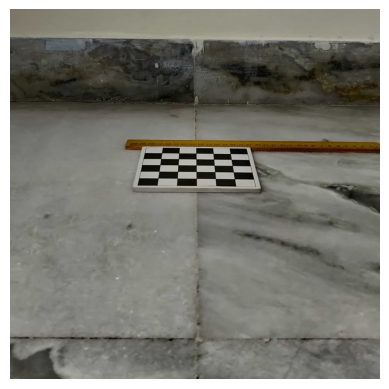

In [246]:
new_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/assign1.jpg")

image_rgb = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()

Now, we got a new image here, we will use this image to calibrate the camera

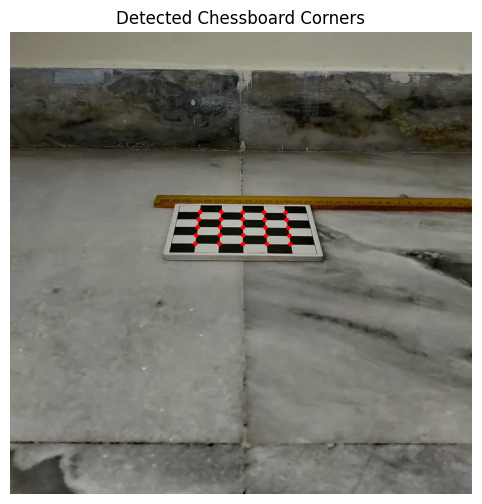

In [247]:
ek_image = new_image.copy()

gray = cv2.cvtColor(ek_image, cv2.COLOR_BGR2GRAY)

chessboard_size = (5, 5)
ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

# Step 4: Draw the corners on the image if found
if ret:

    for corner in corners:
        # cv2.circle(image, center, radius, color, thickness)
        # Note: corner.ravel() converts corner coordinates from array shape (1, 2) to flat array (2,)
        cv2.circle(ek_image, tuple(corner.ravel().astype(int)), radius=5, color=(0, 0, 255), thickness=10)


    # Convert image color to RGB since matplotlib expects this format
    image_rgb = cv2.cvtColor(ek_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 6))

    plt.imshow(image_rgb)
    plt.title('Detected Chessboard Corners')
    plt.axis('off')  # Optional: Hide axes for better visualization
    plt.show()
else:
    print("Chessboard corners not found.")

Again, we find the internal corners of chessboard and mark them on the image with the help of findChessboardCorners()

In [248]:
print(corners)

[[[ 869.1648   823.09216]]

 [[ 966.8472   823.3986 ]]

 [[1064.3094   825.2774 ]]

 [[1161.6227   825.8564 ]]

 [[1259.0435   827.14886]]

 [[ 862.4519   856.40405]]

 [[ 964.0967   856.5464 ]]

 [[1064.4556   857.5128 ]]

 [[1164.6781   858.9533 ]]

 [[1265.5962   859.5603 ]]

 [[ 858.6876   891.21045]]

 [[ 961.57446  891.577  ]]

 [[1065.5906   893.5131 ]]

 [[1167.9188   893.8629 ]]

 [[1271.5347   895.8489 ]]

 [[ 851.7009   929.1582 ]]

 [[ 959.2433   928.81525]]

 [[1066.2081   929.342  ]]

 [[1171.7886   931.4027 ]]

 [[1277.0616   931.96326]]

 [[ 847.7739   967.18225]]

 [[ 957.32434  967.0526 ]]

 [[1065.4227   969.0103 ]]

 [[1175.454    969.3    ]]

 [[1281.9503   970.62494]]]


In [249]:
world_coordinates = np.array([
    [2,2,0],
    [2,4, 0],
    [2,6,0],
    [2,8,0],
    [2,10,0],
    [4,2,0],
    [6,2,0],
    [8,2,0],
    [10,2,0]
], dtype=np.float32)

image_coordinates = np.array([
    [847.7739,967.18225],
    [851.7009,929.1582 ],
    [858.6876,891.21045],
    [862.4519,856.40405],
    [869.1648, 823.09216],
    [957.32434, 967.0526],
    [1065.4227, 969.0103],
    [1175.454,969.3],
    [1281.9503, 970.62494]
], dtype=np.float32)

# projection_matrix = estimate_projection_matrix_DLT(world_coordinates, image_coordinates)

# print(projection_matrix)

image_rgb = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

# Step 3: Divide the image into left and right halves
image_height, image_width, _ = image_rgb.shape

# Reshape the arrays for the function call
world_coordinates = world_coordinates.reshape(-1, 1, 3)
image_coordinates = image_coordinates.reshape(-1, 1, 2)

# Provide an initial guess for the camera matrix with no skew or distortion
# Focal length is set as the average of the image width and height
focal_length = (image_width + image_height) / 2.0
initial_camera_matrix = np.array([[focal_length, 0, image_width / 2],
                                   [0, focal_length, image_height / 2],
                                   [0, 0, 1]], dtype=np.float32)

# Calibrate the camera using the provided data and initial guess
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([world_coordinates], [image_coordinates], (image_width, image_height), initial_camera_matrix, None, flags=cv2.CALIB_USE_INTRINSIC_GUESS)

#
print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)

Camera matrix : 

[[3.46461144e+03 0.00000000e+00 1.09274920e+03]
 [0.00000000e+00 1.61459765e+03 1.03958320e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

[[-3.45081260e+00  2.58901581e+02 -5.17847229e-02 -4.41326986e-02
  -7.41085668e+03]]
rvecs : 

(array([[2.48280938],
       [0.01737342],
       [0.00343383]]),)
tvecs : 

(array([[-6.50415703],
       [-1.28031951],
       [62.1500429 ]]),)


Now, we define the world coordinates of the system and then their corresponding image coordinates as well and use OpenCV to calibrate the camera

In [250]:
K = mtx

# Convert rotation vectors to rotation matrices
R_list = [cv2.Rodrigues(rvec)[0] for rvec in rvecs]

# Combine rotation matrices and translation vectors into extrinsic matrices
extrinsic_matrices = [np.hstack((R, tvec)) for R, tvec in zip(R_list, tvecs)]

# Calculate projection matrices
projection_matrices = [np.dot(K, extrinsic_matrix) for extrinsic_matrix in extrinsic_matrices]

# Print projection matrices
for i, P in enumerate(projection_matrices):
    print(f"Projection Matrix {i+1}:\n", P)

print(P)

Projection Matrix 1:
 [[ 3.46232175e+03  7.09359090e+02 -8.40696747e+02  4.53800326e+04]
 [ 1.97202166e+01 -6.40307831e+02 -1.81032477e+03  6.25429394e+04]
 [-1.80649343e-03  6.12107009e-01 -7.90772879e-01  6.21500429e+01]]
[[ 3.46232175e+03  7.09359090e+02 -8.40696747e+02  4.53800326e+04]
 [ 1.97202166e+01 -6.40307831e+02 -1.81032477e+03  6.25429394e+04]
 [-1.80649343e-03  6.12107009e-01 -7.90772879e-01  6.21500429e+01]]


Further combine the intrinsic and extrinsic matrices to make the projection matrix

In [251]:
outer_corners = np.array([
    [0,0,0,1],
    [12,0,0,1],
    [0,12,0,1],
    [12,12,0,1]
])

Define the outer corners in world coordinates and get their correponding image coordinates with the help of the projection matrix

In [252]:
image_coordinates_homogeneous = project_world_to_image(P, outer_corners.T)

# Convert homogeneous coordinates to non-homogeneous coordinates
image_coordinates = image_coordinates_homogeneous / image_coordinates_homogeneous[-1]

print("Image Coordinates:")
print(image_coordinates.T)

image_coordinates = image_coordinates.T

Image Coordinates:
[[7.30168966e+02 1.00632174e+03 1.00000000e+00]
 [1.39916596e+03 1.01048180e+03 1.00000000e+00]
 [7.75481517e+02 7.89394738e+02 1.00000000e+00]
 [1.37376119e+03 7.93047274e+02 1.00000000e+00]]


In [253]:
image_coordinates = image_coordinates[:, :2] / image_coordinates[:, 2:]

print("Cartesian Image Coordinates:")
print(image_coordinates)

Cartesian Image Coordinates:
[[ 730.16896597 1006.32174135]
 [1399.16596149 1010.48179873]
 [ 775.48151729  789.39473753]
 [1373.76118639  793.04727399]]


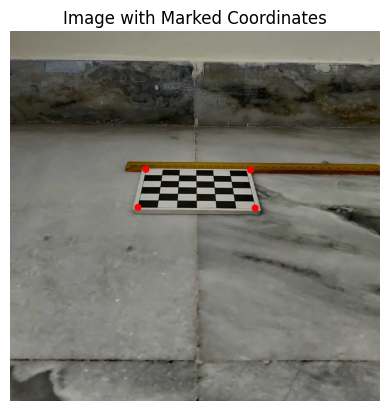

In [254]:
kuchOr = new_image.copy()

for coord in image_coordinates:
    coord_int = tuple(coord.astype(int))  # Convert to integers
    cv2.circle(kuchOr, coord_int, radius=5, color=(0, 0, 255), thickness=30)  # Red color (BGR)

# Convert image color to RGB (for Matplotlib compatibility)
image_rgb = cv2.cvtColor(kuchOr, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.title('Image with Marked Coordinates')
plt.axis('off')
plt.show()

Mark those corners on the image

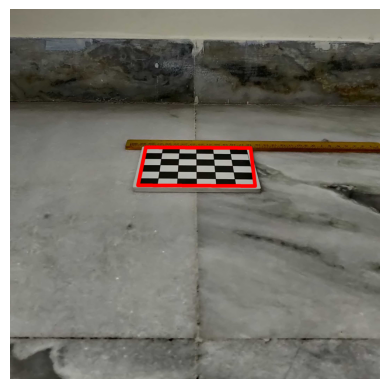

In [255]:
image_new = new_image.copy()

image_rgb = cv2.cvtColor(image_new, cv2.COLOR_BGR2RGB)

# Draw a red line between the points on the image
coord_int1 = tuple(image_coordinates[0].astype(int))
coord_int2 = tuple(image_coordinates[1].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

coord_int1 = tuple(image_coordinates[1].astype(int))
coord_int2 = tuple(image_coordinates[3].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

coord_int1 = tuple(image_coordinates[2].astype(int))
coord_int2 = tuple(image_coordinates[3].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

coord_int1 = tuple(image_coordinates[0].astype(int))
coord_int2 = tuple(image_coordinates[2].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

# coord_int1 = tuple(image_coordinates[3].astype(int))
# coord_int2 = tuple(image_coordinates[5].astype(int))
# image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

# coord_int1 = tuple(image_coordinates[5].astype(int))
# coord_int2 = tuple(image_coordinates[4].astype(int))
# image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

# coord_int1 = tuple(image_coordinates[0].astype(int))
# coord_int2 = tuple(image_coordinates[4].astype(int))
# image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()

Draw a wireframe with those marked coordinates

In [256]:
world_origin = np.array([
    [0,0,0,1]
])

In [257]:
image_coordinates_homogeneous = project_world_to_image(P, world_origin.T)

# Convert homogeneous coordinates to non-homogeneous coordinates
image_coordinates = image_coordinates_homogeneous / image_coordinates_homogeneous[-1]

print("Image Coordinates:")
print(image_coordinates.T)

image_coordinates = image_coordinates.T

Image Coordinates:
[[7.30168966e+02 1.00632174e+03 1.00000000e+00]]


In [258]:
image_coordinates = image_coordinates[:, :2] / image_coordinates[:, 2:]

print("Cartesian Image Coordinates:")
print(image_coordinates)

Cartesian Image Coordinates:
[[ 730.16896597 1006.32174135]]


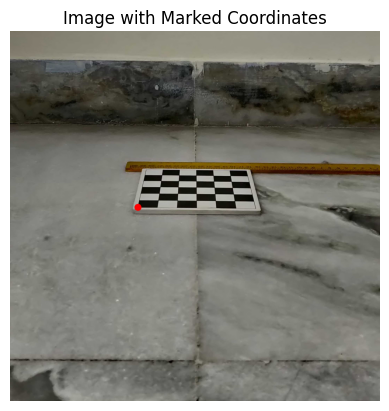

In [259]:
kuchOr = new_image.copy()

for coord in image_coordinates:
    coord_int = tuple(coord.astype(int))  # Convert to integers
    cv2.circle(kuchOr, coord_int, radius=5, color=(0, 0, 255), thickness=30)  # Red color (BGR)

# Convert image color to RGB (for Matplotlib compatibility)
image_rgb = cv2.cvtColor(kuchOr, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.title('Image with Marked Coordinates')
plt.axis('off')
plt.show()

Here, we are trying to mark the world coordinate

In [260]:
outer_corners = np.array([
    [10,0,0,1],
    [22,0,0,1],
    [10,12,0,1],
    [22,12,0,1]
])

image_coordinates_homogeneous = project_world_to_image(P, outer_corners.T)

# Convert homogeneous coordinates to non-homogeneous coordinates
image_coordinates = image_coordinates_homogeneous / image_coordinates_homogeneous[-1]

print("Image Coordinates:")
print(image_coordinates.T)

image_coordinates = image_coordinates.T


image_coordinates = image_coordinates[:, :2] / image_coordinates[:, 2:]

print("Cartesian Image Coordinates:")
print(image_coordinates)

Image Coordinates:
[[1.28763404e+03 1.00978825e+03 1.00000000e+00]
 [1.95702019e+03 1.01395073e+03 1.00000000e+00]
 [1.27402198e+03 7.92438360e+02 1.00000000e+00]
 [1.87261286e+03 7.96092796e+02 1.00000000e+00]]
Cartesian Image Coordinates:
[[1287.63404365 1009.78825424]
 [1957.02018671 1013.95073147]
 [1274.02198154  792.43835963]
 [1872.61285965  796.09279604]]


Now, shifting the wireframe by 10 cm in x direction<br>
This will be done by adding 10cm to the world coordinates of the outer corners and then further finding their image coordinates and making lines through them

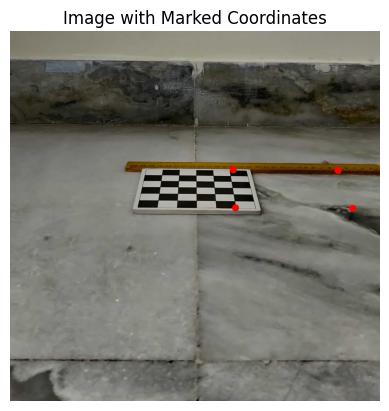

In [261]:
kuchOr = new_image.copy()

for coord in image_coordinates:
    coord_int = tuple(coord.astype(int))  # Convert to integers
    cv2.circle(kuchOr, coord_int, radius=5, color=(0, 0, 255), thickness=30)  # Red color (BGR)

# Convert image color to RGB (for Matplotlib compatibility)
image_rgb = cv2.cvtColor(kuchOr, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.title('Image with Marked Coordinates')
plt.axis('off')
plt.show()

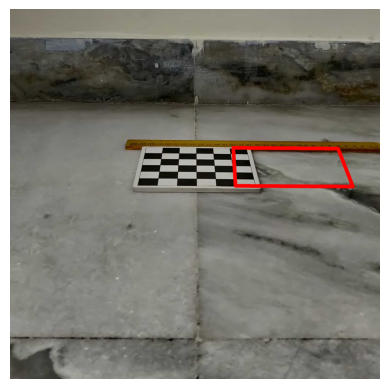

In [262]:
image_new = new_image.copy()

image_rgb = cv2.cvtColor(image_new, cv2.COLOR_BGR2RGB)

# Draw a red line between the points on the image
coord_int1 = tuple(image_coordinates[0].astype(int))
coord_int2 = tuple(image_coordinates[1].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

coord_int1 = tuple(image_coordinates[1].astype(int))
coord_int2 = tuple(image_coordinates[3].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

coord_int1 = tuple(image_coordinates[2].astype(int))
coord_int2 = tuple(image_coordinates[3].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

coord_int1 = tuple(image_coordinates[0].astype(int))
coord_int2 = tuple(image_coordinates[2].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

# coord_int1 = tuple(image_coordinates[3].astype(int))
# coord_int2 = tuple(image_coordinates[5].astype(int))
# image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

# coord_int1 = tuple(image_coordinates[5].astype(int))
# coord_int2 = tuple(image_coordinates[4].astype(int))
# image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

# coord_int1 = tuple(image_coordinates[0].astype(int))
# coord_int2 = tuple(image_coordinates[4].astype(int))
# image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()

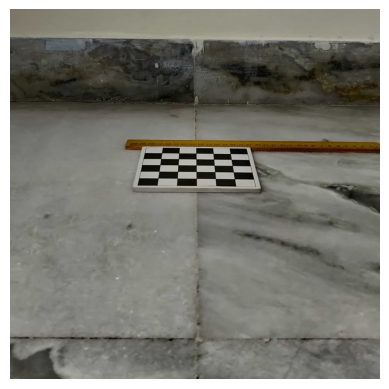

In [263]:
ekOrImage = new_image.copy()

image_rgb1 = cv2.cvtColor(ekOrImage, cv2.COLOR_BGR2RGB)


height, width, _ = image_rgb1.shape

plt.imshow(image_rgb1)
plt.axis('off')  # Hide axis
plt.show()

# warped_image = cv2.warpPerspective(ekOrImage, perspective_matrix, (width, height))

In [264]:
warped_image = cv2.warpPerspective(ekOrImage, mtx, (width, height))

Now, we have to move the chessboard by 10cm<br>
So, we will first apply masking to get the portion of chessboard from the originl image<br>

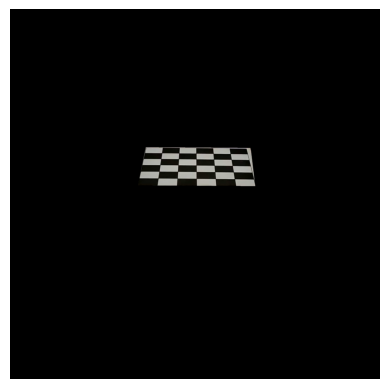

In [265]:
# mask = np.zeros_like(ekOrImage)
# cv2.drawContours(mask, [wireframe_contours], -1, (255, 255, 255), thickness=cv2.FILLED)

# Define the outer corners of the chessboard
outer_corners = np.array([[730.16896597, 1006.32174135],
                          [775.48151729, 789.39473753],
                          [1373.76118639, 793.04727399],
                          [1399.16596149, 1010.48179873]
], dtype=np.float32)

# Create a binary mask
mask = np.zeros_like(ekOrImage[:,:,0])

# Draw a filled polygon using the corner points
cv2.fillConvexPoly(mask, np.int32(outer_corners), (255, 255, 255))

# Invert the mask to keep the chessboard region
# mask = cv2.bitwise_not(mask)

# Apply the mask to the image
masked_image = cv2.bitwise_and(ekOrImage, ekOrImage, mask=mask)


masked_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)

plt.imshow(masked_image_rgb)
plt.axis('off')  # Hide axis
plt.show()
# Display the masked image
# cv2.imshow('Masked Image', masked_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [266]:
outer_corners = np.array([
    [0,0,0,1],
    [12,0,0,1],
    [0,12,0,1],
    [12,12,0,1]
])

image_coordinates_homogeneous = project_world_to_image(P, outer_corners.T)

# Convert homogeneous coordinates to non-homogeneous coordinates
image_coordinates = image_coordinates_homogeneous / image_coordinates_homogeneous[-1]

print("Image Coordinates:")
print(image_coordinates.T)

image_coordinates = image_coordinates.T

image_coordinates = image_coordinates[:, :2] / image_coordinates[:, 2:]

print("Cartesian Image Coordinates:")
print(image_coordinates)

Image Coordinates:
[[7.30168966e+02 1.00632174e+03 1.00000000e+00]
 [1.39916596e+03 1.01048180e+03 1.00000000e+00]
 [7.75481517e+02 7.89394738e+02 1.00000000e+00]
 [1.37376119e+03 7.93047274e+02 1.00000000e+00]]
Cartesian Image Coordinates:
[[ 730.16896597 1006.32174135]
 [1399.16596149 1010.48179873]
 [ 775.48151729  789.39473753]
 [1373.76118639  793.04727399]]


Now, we will see what is 10cm shift in image coordinates

In [267]:
outer_corners1 = np.array([
    [10,0,0,1],
    [22,0,0,1],
    [10,12,0,1],
    [22,12,0,1]
])

image_coordinates_homogeneous1 = project_world_to_image(P, outer_corners1.T)

# Convert homogeneous coordinates to non-homogeneous coordinates
image_coordinates1 = image_coordinates_homogeneous1 / image_coordinates_homogeneous1[-1]

print("Image Coordinates:")
print(image_coordinates1.T)

image_coordinates1 = image_coordinates1.T

image_coordinates1 = image_coordinates1[:, :2] / image_coordinates1[:, 2:]

print("Cartesian Image Coordinates:")
print(image_coordinates1)

Image Coordinates:
[[1.28763404e+03 1.00978825e+03 1.00000000e+00]
 [1.95702019e+03 1.01395073e+03 1.00000000e+00]
 [1.27402198e+03 7.92438360e+02 1.00000000e+00]
 [1.87261286e+03 7.96092796e+02 1.00000000e+00]]
Cartesian Image Coordinates:
[[1287.63404365 1009.78825424]
 [1957.02018671 1013.95073147]
 [1274.02198154  792.43835963]
 [1872.61285965  796.09279604]]


In [268]:
result_matrix = image_coordinates1 - image_coordinates
print(result_matrix)

[[557.46507768   3.46651289]
 [557.85422522   3.46893274]
 [498.54046425   3.0436221 ]
 [498.85167326   3.04552205]]


In [269]:
# new_mask = np.zeros_like(ekOrImage[:,:,:])

# print(new_mask.shape)

# Get dimensions of the masked image
rows, cols, channels = masked_image.shape

# Traverse through the masked image using nested for loops
for i in range(rows):
    for j in range(cols):
        for k in range(channels):
            # Check if the current pixel value is non-zero
            if masked_image[i, j, k] != 0:
                # Print the non-zero pixel value
                new_image[i+3,j+557,k] = masked_image[i, j, k]


After calculating the shift, we will go to the masked image and use those values and copy them in original image by using the shifted coordinates as well

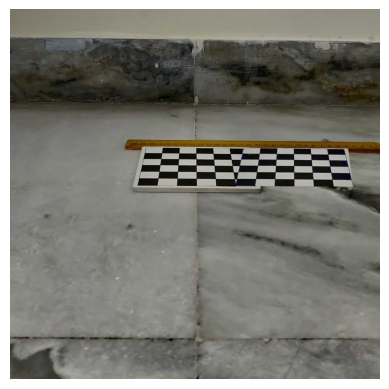

In [270]:
new_mask_rgb = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

plt.imshow(new_mask_rgb)
plt.axis('off')  # Hide axis
plt.show()

Image Coordinates:
[[1.28763404e+03 1.00978825e+03 1.00000000e+00]
 [1.95702019e+03 1.01395073e+03 1.00000000e+00]
 [1.27402198e+03 7.92438360e+02 1.00000000e+00]
 [1.87261286e+03 7.96092796e+02 1.00000000e+00]]
Cartesian Image Coordinates:
[[1287.63404365 1009.78825424]
 [1957.02018671 1013.95073147]
 [1274.02198154  792.43835963]
 [1872.61285965  796.09279604]]


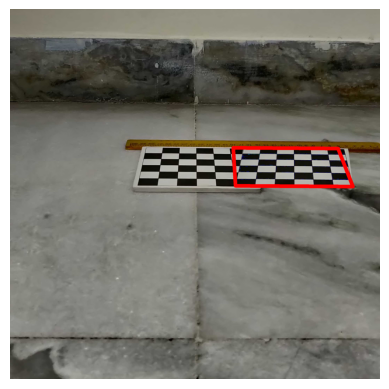

In [271]:
outer_corners = np.array([
    [10,0,0,1],
    [22,0,0,1],
    [10,12,0,1],
    [22,12,0,1]
])

image_coordinates_homogeneous = project_world_to_image(P, outer_corners.T)

# Convert homogeneous coordinates to non-homogeneous coordinates
image_coordinates = image_coordinates_homogeneous / image_coordinates_homogeneous[-1]

print("Image Coordinates:")
print(image_coordinates.T)

image_coordinates = image_coordinates.T


image_coordinates = image_coordinates[:, :2] / image_coordinates[:, 2:]

print("Cartesian Image Coordinates:")
print(image_coordinates)

image_new = new_image.copy()

image_rgb = cv2.cvtColor(image_new, cv2.COLOR_BGR2RGB)

# Draw a red line between the points on the image
coord_int1 = tuple(image_coordinates[0].astype(int))
coord_int2 = tuple(image_coordinates[1].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

coord_int1 = tuple(image_coordinates[1].astype(int))
coord_int2 = tuple(image_coordinates[3].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

coord_int1 = tuple(image_coordinates[2].astype(int))
coord_int2 = tuple(image_coordinates[3].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

coord_int1 = tuple(image_coordinates[0].astype(int))
coord_int2 = tuple(image_coordinates[2].astype(int))
image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

# coord_int1 = tuple(image_coordinates[3].astype(int))
# coord_int2 = tuple(image_coordinates[5].astype(int))
# image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

# coord_int1 = tuple(image_coordinates[5].astype(int))
# coord_int2 = tuple(image_coordinates[4].astype(int))
# image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

# coord_int1 = tuple(image_coordinates[0].astype(int))
# coord_int2 = tuple(image_coordinates[4].astype(int))
# image_rgb = cv2.line(image_rgb, coord_int1, coord_int2, (255, 0, 0), thickness=20)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()

Now, we draw a wireframe for the new chessbaord